# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [2]:
# data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

# plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# make sure charts appear in the notebook:
%matplotlib inline

//anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [3]:
billboard_data = pd.read_csv('../../project-02/assets/billboard.csv')

billboard_data.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#billboard_data.tail()

In [5]:
#billboard_data.describe()

In [6]:
#billboard_data.dtypes

In [7]:
#billboard_data.info()

##### Create a data dictionary for the data set. (ie: describe the variables of your dataset)



|Variables|description|
|----------|-----------|
|billboard_data| raw data from billboard.csv|
|year | year of the track|
|artist | name of the artist|
|track | name of the song track|
|genre | genre of music|
|time | total time of the track|
|date entered |date that entered the billboard chart|
|date peaked |date where the track acheived its highest rank|
|billboard_data_long

##### Write a brief description of your data, and any interesting observations you've made thus far. 

The dataset describes billboard charts in the year 2000. 

Observations:

-Most of the weeks have null data and contains nothing.

-The mean of first three weeks of the charts are below a rank of 65, but gradually becomes higher with future weeks.

-This also shows in the standard deviation increasing with every week. It shows the ranks of tracks distancing themselves from each other.

## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, fill in any missing values. 


In [8]:
#char = ['$', '#', '&', '%', '/', ' ', '?','.','x']

#for col in billboard_data.columns:
#    print col, 
#   [x in col for x in char]
#    if any ([x in col for x in char]):
#        newcol = ''.join([x for x in col if x not in char])
#        print newcol
#        billboard_data.rename(columns={col:newcol}, inplace=True)

#for i in billboard_data.columns:
#    print i


In [9]:
columns = billboard_data.columns

for col in columns: # go through all the column names
    if any([char in col for char in ['$','&','%','#','x','.']]): 
    # you are already looping so you dont need to call a for loop in char in col
    #(t in col if any t in [...] replace w/ '')
        newcol = ''.join([char for char in col if char not in ['$','&','%','#','x','.']])
        billboard_data.rename(columns={col:newcol}, inplace=True)

billboard_data.rename(columns={'x13thwek': '13thweek', 'artistinverted': 'artist'}, inplace = True)

columns

Index([u'year', u'artist.inverted', u'track', u'time', u'genre',
       u'date.entered', u'date.peaked', u'x1st.week', u'x2nd.week',
       u'x3rd.week', u'x4th.week', u'x5th.week', u'x6th.week', u'x7th.week',
       u'x8th.week', u'x9th.week', u'x10th.week', u'x11th.week', u'x12th.week',
       u'x13th.wek', u'x14th.week', u'x15th.week', u'x16th.week',
       u'x17th.week', u'x18th.week', u'x19th.week', u'x20th.week',
       u'x21st.week', u'x22nd.week', u'x23rd.week', u'x24th.week',
       u'x25th.week', u'x26th.week', u'x27th.week', u'x28th.week',
       u'x29th.week', u'x30th.week', u'x31st.week', u'x32nd.week',
       u'x33rd.week', u'x34th.week', u'x35th.week', u'x36th.week',
       u'x37th.week', u'x38th.week', u'x39th.week', u'x40th.week',
       u'x41st.week', u'x42nd.week', u'x43rd.week', u'x44th.week',
       u'x45th.week', u'x46th.week', u'x47th.week', u'x48th.week',
       u'x49th.week', u'x50th.week', u'x51st.week', u'x52nd.week',
       u'x53rd.week', u'x54th.week', u'x5

In [10]:
#billboard_data.fillna(0, inplace=True)

# for num in billboard_data['1stweek']:
#     num = float(num)
#     print num
#billboard_data['time'] = pd.to_datetime(billboard_data['time'])

#billboard_data.dtypes


##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [11]:
#How do you make a data set long?
# pd.melt

billboard_data_long = pd.melt(billboard_data,
                             id_vars=['artist','year','track','time',
                                      'genre','dateentered','datepeaked'],
                            value_vars = None,
                            var_name = 'week',
                            value_name = 'rank')

billboard_data_long

,artist,year,track,time,genre,dateentered,datepeaked,week,rank
0,Destiny's Child,2000,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1stweek,78.0
1,Santana,2000,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1stweek,15.0
2,Savage Garden,2000,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1stweek,71.0
3,Madonna,2000,Music,3:45,Rock,2000-08-12,2000-09-16,1stweek,41.0
4,"Aguilera, Christina",2000,Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1stweek,57.0
5,Janet,2000,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,1stweek,59.0
6,Destiny's Child,2000,Say My Name,4:31,Rock,1999-12-25,2000-03-18,1stweek,83.0
7,"Iglesias, Enrique",2000,Be With You,3:36,Latin,2000-04-01,2000-06-24,1stweek,63.0
8,Sisqo,2000,Incomplete,3:52,Rock,2000-06-24,2000-08-12,1stweek,77.0
9,Lonestar,2000,Amazed,4:25,Country,1999-06-05,2000-03-04,1stweek,81.0


In [24]:
billboard_data_long.groupby(['rank','artist','track']).min().head(20)

year  time  \
rank artist              track                                               
1.0  Aaliyah             Try Again                              2000  4:03   
     Aguilera, Christina Come On Over Baby (All I Want Is You)  2000  3:38   
                         What A Girl Wants                      2000  3:18   
     Carey, Mariah       Thank God I Found You                  2000  4:14   
     Creed               With Arms Wide Open                    2000  3:52   
     Destiny's Child     Independent Women Part I               2000  3:38   
                         Say My Name                            2000  4:31   
     Iglesias, Enrique   Be With You                            2000  3:36   
     Janet               Doesn't Really Matter                  2000  4:17   
     Lonestar            Amazed                                 2000  4:25   
     Madonna             Music                                  2000  3:45   
     N'Sync              It's Gonna Be Me                       2000  3:10   
     Santana             Maria, Maria                           2000  4:18   
     Savage Garden       I Knew I Loved You                     2000  4:07   
     Sisqo               Incomplete                             2000  3:52   
     Vertical Horizon    Everything You Want                    2000  4:01   
     matchbox twenty     Bent                                   2000  4:12   
2.0  98�                 Give Me Just One Night (Una Noche)     2000  3:24   
     Aaliyah             Try Again                              2000  4:03   
     Aguilera, Christina What A Girl Wants                      2000  3:18   

                                                                  genre  \
rank artist              track                                            
1.0  Aaliyah             Try Again                                 Rock   
     Aguilera, Christina Come On Over Baby (All I Want Is You)     Rock   
                         What A Girl Wants                         Rock   
     Carey, Mariah       Thank God I Found You                     Rock   
     Creed               With Arms Wide Open                       Rock   
     Destiny's Child     Independent Women Part I                  Rock   
                         Say My Name                               Rock   
     Iglesias, Enrique   Be With You                              Latin   
     Janet               Doesn't Really Matter                     Rock   
     Lonestar            Amazed                                 Country   
     Madonna             Music                                     Rock   
     N'Sync              It's Gonna Be Me                          Rock   
     Santana             Maria, Maria                              Rock   
     Savage Garden       I Knew I Loved You                        Rock   
     Sisqo               Incomplete                                Rock   
     Vertical Horizon    Everything You Want                       Rock   
     matchbox twenty     Bent                                      Rock   
2.0  98�                 Give Me Just One Night (Una Noche)        Rock   
     Aaliyah             Try Again                                 Rock   
     Aguilera, Christina What A Girl Wants                         Rock   

                                                               dateentered  \
rank artist              track                                               
1.0  Aaliyah             Try Again                              2000-03-18   
     Aguilera, Christina Come On Over Baby (All I Want Is You)  2000-08-05   
                         What A Girl Wants                      1999-11-27   
     Carey, Mariah       Thank God I Found You                  1999-12-11   
     Creed               With Arms Wide Open                    2000-05-13   
     Destiny's Child     Independent Women Part I               2000-09-23   
                         Say My Name                            1999-12-

In [26]:
billboard_data_long.groupby(['rank','artist','track']).max().tail(20)

year  time    genre  \
rank  artist          track                                               
100.0 Lil' Mo         Ta Da                         2000  4:17      Rap   
      Limp Bizkit     Re-Arranged                   2000  4:08     Rock   
                      Rollin'                       2000  4:04     Rock   
      Martin, Ricky   She Bangs                     2000  4:02    Latin   
      McEntire, Reba  I'll Be                       2000  4:23  Country   
      McKnight, Brian Stay Or Let It Go             2000  4:32     Rock   
      Nelly           (Hot S**t) Country Grammar    2000  4:17      Rap   
      Nine Days       If I Am                       2000  4:18     Rock   
      No Doubt        Simple Kind Of Life           2000  4:11     Rock   
      Price, Kelly    Love Sets You Free            2000  3:46     Rock   
      Sheist, Shade   Where I Wanna Be              2000  4:16      Rap   
      Shyne           Bad Boyz                      2000  4:22      Rap   
      Sister Hazel    Change Your Mind              2000  4:02     Rock   
      Spears, Britney Lucky                         2000  3:23     Rock   
      Splender        I Think God Can Explain       2000  3:55      R&B   
      Stone, Angie    No More Rain (In This Cloud)  2000  4:42      R&B   
      Sugar Ray       Falls Apart                   2000  4:15     Rock   
      Trina           Pull Over                     2000  2:58      Rap   
      Urban, Keith    Your Everything               2000  4:10  Country   
      Vitamin C       The Itch                      2000  3:30     Rock   

                                                   dateentered  datepeaked  \
rank  artist          track                                                  
100.0 Lil' Mo         Ta Da                         2000-08-12  2000-09-16   
      Limp Bizkit     Re-Arranged                   1999-12-04  2000-02-05   
                      Rollin'                       2000-11-11  2000-12-09   
      Martin, Ricky   She Bangs                     2000-10-07  2000-12-02   
      McEntire, Reba  I'll Be                       2000-05-13  2000-07-29   
      McKnight, Brian Stay Or Let It Go             2000-02-26  2000-03-25   
      Nelly           (Hot S**t) Country Grammar    2000-04-29  2000-09-16   
      Nine Days       If I Am                       2000-12-02  2000-12-02   
      No Doubt        Simple Kind Of Life           2000-07-01  2000-07-22   
      Price, Kelly    Love Sets You Free            2000-05-13  2000-05-20   
      Sheist, Shade   Where I Wanna Be              2000-11-11  2000-11-18   
      Shyne           Bad Boyz                      2000-09-09  2000-10-28   
      Sister Hazel    Change Your Mind              2000-07-15  2000-08-05   
      Spears, Britney Lucky                         2000-08-12  2000-09-09   
      Splender        I Think God Can Explain       2000-06-10  2000-06-24   
      Stone, Angie    No More Rain (In This Cloud)  1999-12-25  2000-01-22   
      Sugar Ray       Falls Apart                   2000-01-15  2000-02-19   
      Trina           Pull Over                     2000-09-09  2000-09-16   
      Urban, Keith    Your Everything               2000-07-15  2000-09-16   
      Vitamin C       The Itch                      2000-12-02  2000-12-16   

                                                        week  
rank  artist          track                                   
100.0 Lil' Mo         Ta Da                          5thweek  
      Limp Bizkit     Re-Arranged                   18thweek  
                      Rollin'                       17thweek  
      Martin, Ricky   She Bangs                     18thweek  
      McEntire, Reba  I'll Be                       20thweek  
      McKnight, Brian Stay Or Let It Go              7thweek  
      Nelly           (Hot S**t) Country Grammar     1stweek  
      Nine Days       If I Am                        5thweek  
      No Doubt        Simple Kind Of Life           12

In [13]:
mask = np.isnan(billboard_data_long['rank'])
data_nan = billboard_data_long[~mask]
data_nan

,artist,year,track,time,genre,dateentered,datepeaked,week,rank
0,Destiny's Child,2000,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1stweek,78.0
1,Santana,2000,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1stweek,15.0
2,Savage Garden,2000,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1stweek,71.0
3,Madonna,2000,Music,3:45,Rock,2000-08-12,2000-09-16,1stweek,41.0
4,"Aguilera, Christina",2000,Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1stweek,57.0
5,Janet,2000,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,1stweek,59.0
6,Destiny's Child,2000,Say My Name,4:31,Rock,1999-12-25,2000-03-18,1stweek,83.0
7,"Iglesias, Enrique",2000,Be With You,3:36,Latin,2000-04-01,2000-06-24,1stweek,63.0
8,Sisqo,2000,Incomplete,3:52,Rock,2000-06-24,2000-08-12,1stweek,77.0
9,Lonestar,2000,Amazed,4:25,Country,1999-06-05,2000-03-04,1stweek,81.0


In [14]:
billboard_data['artist'].describe()

count       317
unique      228
top       Jay-Z
freq          5
Name: artist, dtype: object

In [15]:
billboard_data['genre'].describe()

count      317
unique      11
top       Rock
freq       137
Name: genre, dtype: object

In [29]:
data_nan[['artist',]].plot()

TypeError: Empty 'DataFrame': no numeric data to plot

## Step 3: Visualize your data.

##### Using a plotting utility of your choice, create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

In [16]:
# billboard_data.head()
# billboard_data.describe()
# billboard_data.tail()
#billboard_data.info()

Rock           137
Country         74
Rap             58
R&B             22
Pop              9
Latin            9
Electronica      4
Gospel           1
R&B\n            1
Jazz             1
Reggae           1
Name: genre, dtype: int64

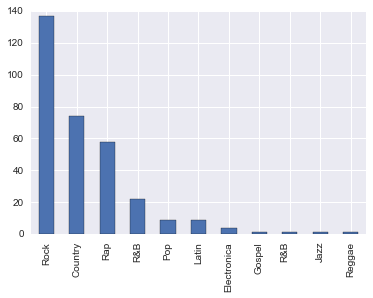

In [17]:
billboard_data['genre'].value_counts().plot(kind='bar')
billboard_data['genre'].value_counts()

In [18]:
#sns.set(rc={"figure.figsize": (8, 8)})

#sns.distplot(billboard_data['1stweek'])

In [19]:
#sns.set(rc={"figure.figsize": (50, 200)})

#sns.barplot(x='rank', y='track', data = billboard_data_long)

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

Some rock songs are too long and can deter people from 
listening which can result in lower ranks on 
the billboard charts. Shorter rock songs will generate higher ranks and greater popularity which will generate more revenue for the song.

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

* Sort columns by genre
* Find the mean times and rank of each genre
* See if the 
* Filter genre by Rock
* 

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for roughly 800-1,000 words. 

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 600 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 